### 1) Importing and Processing the Data

In [2]:
# import the necessary package
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# import data 
house = pd.read_csv('GA house_new.csv')

house.head(5).round(3)

,DATE,Housing Index,New Private Housing Units,Unemployment rate,"All employee, Social Assistance","All Employee, Education, Health Service",Median Household Income
0,2000-01-01,229.98,7993.215,3.633,309.833,345.900,41901
1,2000-04-01,233.73,7696.030,3.700,311.733,348.767,41901
2,2000-07-01,237.51,7486.818,3.600,312.800,352.267,41901
3,2000-10-01,241.40,7551.964,3.400,315.433,354.533,41901
4,2001-01-01,248.19,7833.710,3.567,315.867,358.000,42576


#### Desprictive Analysis

In [3]:
house.describe().round(3)

,Housing Index,New Private Housing Units,Unemployment rate,"All employee, Social Assistance","All Employee, Education, Health Service",Median Household Income
count,80.000,80.000,80.000,80.000,80.000,80.000
mean,295.154,4924.321,6.082,408.727,474.074,47690.150
std,37.565,2654.502,2.280,60.762,76.497,5021.495
min,229.980,1222.641,3.133,309.833,345.900,40984.000
25%,265.507,2802.340,4.475,359.158,411.492,43239.750
50%,290.180,4246.093,5.150,403.367,469.367,46609.500
75%,319.662,7700.416,7.708,456.242,533.050,49858.250
max,389.630,9752.292,10.600,527.133,621.567,57985.000


### Data Cleaning

In [5]:
house.insert(7, "monthYear", len(house), True)
house['monthYear']  = house['DATE'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
house.head()

,DATE,Housing Index,New Private Housing Units,Unemployment rate,"All employee, Social Assistance","All Employee, Education, Health Service",Median Household Income,monthYear
0,2000-01-01,229.98,7993.215447,3.633333,309.833333,345.900000,41901,2000-01
1,2000-04-01,233.73,7696.030050,3.700000,311.733333,348.766667,41901,2000-04
2,2000-07-01,237.51,7486.817740,3.600000,312.800000,352.266667,41901,2000-07
3,2000-10-01,241.40,7551.963652,3.400000,315.433333,354.533333,41901,2000-10
4,2001-01-01,248.19,7833.710288,3.566667,315.866667,358.000000,42576,2001-01


In [6]:
house['monthYear'] = pd.to_datetime(house['monthYear'])
house.info()
house.head(5).round(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   DATE                                     80 non-null     object        
 1   Housing Index                            80 non-null     float64       
 2   New Private Housing Units                80 non-null     float64       
 3   Unemployment rate                        80 non-null     float64       
 4   All employee, Social Assistance          80 non-null     float64       
 5   All Employee, Education, Health Service  80 non-null     float64       
 6   Median Household Income                  80 non-null     int64         
 7   monthYear                                80 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 5.1+ KB


,DATE,Housing Index,New Private Housing Units,Unemployment rate,"All employee, Social Assistance","All Employee, Education, Health Service",Median Household Income,monthYear
0,2000-01-01,229.98,7993.215,3.633,309.833,345.900,41901,2000-01-01
1,2000-04-01,233.73,7696.030,3.700,311.733,348.767,41901,2000-04-01
2,2000-07-01,237.51,7486.818,3.600,312.800,352.267,41901,2000-07-01
3,2000-10-01,241.40,7551.964,3.400,315.433,354.533,41901,2000-10-01
4,2001-01-01,248.19,7833.710,3.567,315.867,358.000,42576,2001-01-01


### Data Visualization

# Data Visualization

Text(0.96, 0.5, 'Unemployment rate %')

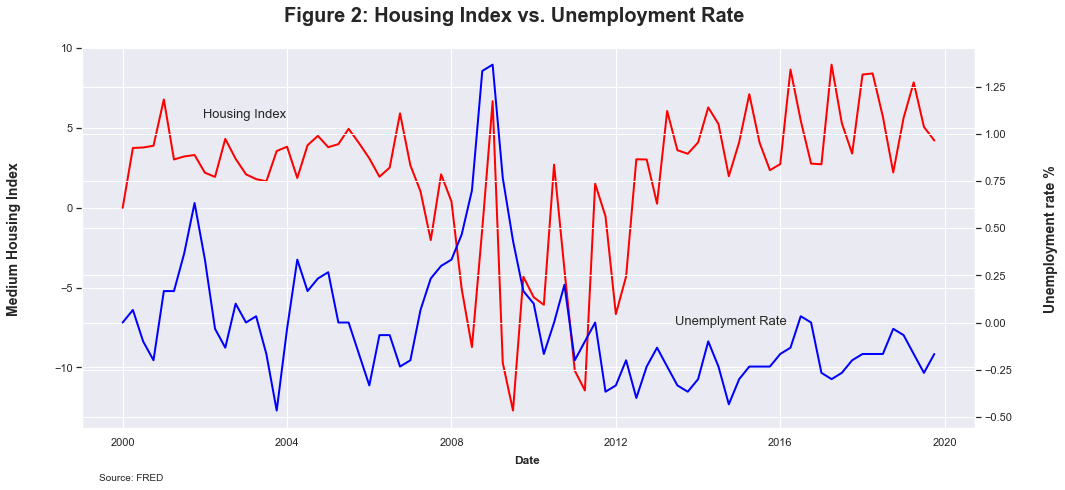

In [16]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (16, 7))
ax.plot(houseDiff.monthYear, houseDiff['Housing Index'], linewidth = 2, c = 'red')

fig.text(0.06, 0.5, "Medium Housing Index", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')
fig.text(0.50, 0.06, 'Date', va = 'center', weight = 'bold', fontsize = 12)
fig.suptitle("Figure 2: Housing Index vs. Unemployment Rate", weight = 'bold', fontsize = 20, y = 0.96) 
fig.text(0.14, 0.02, 'Source: FRED', fontsize = 10, weight = 'normal')

fig.text(0.23, 0.74, "Housing Index",  weight = 'normal', fontsize = 13) 
fig.text(0.64, 0.33, "Unemplyment Rate",  weight = 'normal', fontsize = 13) 

ax2= ax.twinx()
ax2.plot(houseDiff.monthYear, houseDiff['Unemployment rate'], linewidth = 2, c = 'blue')
fig.text(0.96, 0.5, "Unemployment rate %", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')

From the graph above, an inverse relationship is indicated. in the anomaly around 2008, housing index decreases as $\Delta$unemployment increases; in the years where housing index does not fluctuate much, $\Delta$unemployment is relative stable.

# Regression Analysis

In [17]:
# make a copy of the house to rename of the dataframe to conduct regression analysis 
houseDiffReg = houseDiff.copy()
houseReg = house.copy()
houseReg.columns = ['DATE', 'houseIndex', 'houseUnits', 'unemployRate', "socialAssistance", "healthService", "houseIncome", "monthYear"]

houseDiffReg.columns = ['DATE', 'houseIndex', 'houseUnits', 'unemployRate', "socialAssistance", "healthService", "houseIncome", "monthYear"]

houseReg.head()



,DATE,houseIndex,houseUnits,unemployRate,socialAssistance,healthService,houseIncome,monthYear
0,2000-01-01,229.98,7993.215447,3.633333,309.833333,345.900000,41901,2000-01-01
1,2000-04-01,233.73,7696.030050,3.700000,311.733333,348.766667,41901,2000-04-01
2,2000-07-01,237.51,7486.817740,3.600000,312.800000,352.266667,41901,2000-07-01
3,2000-10-01,241.40,7551.963652,3.400000,315.433333,354.533333,41901,2000-10-01
4,2001-01-01,248.19,7833.710288,3.566667,315.866667,358.000000,42576,2001-01-01


In [18]:
modelHouse = smf.ols('houseIndex ~ houseUnits + unemployRate + socialAssistance + healthService + houseIncome', data=houseReg).fit()
modelHouseDiff = smf.ols('houseIndex ~ houseUnits + unemployRate + socialAssistance + healthService + houseIncome', data=houseDiffReg).fit()


In [19]:
st=Stargazer([modelHouse, modelHouseDiff])
st.title("Regression on HouseIndex")
st.custom_columns(['modelHouse', 'modelHouseDiff'], [1, 1])
st.covariate_order(['houseIncome', 'houseUnits', 'unemployRate', 'socialAssistance', 'healthService', 'Intercept'])
from IPython.core.display import HTML
HTML(st.render_html())

$$ Medium house index = 0.001houseIncome - 7.904unemployRate - 3.913socialAssistance + 3.398healthService + 276.216$$ 

We can also dissect the model to examine the individual factor effect on the medium house index when controllling for other factors:

* **houseIncome**: an unit increase in houseIncome leads to 0.001 increase in the Medium house index
* **unemployRate**: an one percertage point increase in unEmployment rate leads to 7.904 decrease in the medium house index
* **socialAssistance**: a thousand increase in number of people in social assistance decreases the medium house index by 3.913
* **healthService**: a thousand increase in the number of people in health service increases the medium house index by 3.398
* **intercept**: when all factors are zero, the medium house index is 276.216

The model also provides an $$R^2 = 0.631$$ which means that about 63.1% of the variations in the response variable can be explained by the independent variables. 

Nevertheless, this doesn't mean that each factor is significant in this regression model. From the table we see that only `unemployRate`, `healthService`, and `Intercept` pass the least significance threshold (p < 0.1), and only `unemployRate` pass the highest significance threshold (p < 0.01). Therefore, the regression model indicates that while number of people in health service and unemployment rate are influencial for the medium house index, unemployment rate is the most statistically significant factor in determining the variation in the medium house index.